# Single Layer Strongly Entangling Circuit

Parameterized quantum circuits generally consist of three parts:
- state preparation where classical data is embedded into a quantum state (see concepts/Quantum embeddings)
- parameterized gates that act on the said quantum state
- measurement

<div class="admonition important">
<div class="admonition-title">Important</div>
    
For discrete variable computing, PennyLane provides simplified circuit architecture templates using the quantum universality of single-qubit rotation gates and imprimitive 2-qubit gates.

PennyLane's qubit circuit architecture (how the gates are placed) can have two layouts:

1. Strongly entangling: Generic rotations followed by entangling gates are applied to all qubits. This prepares strongly entangled quantum states that can ideally explore the whole Hilbert space.

2. Random: Randomly chosen rotations and randomly placed entangling gates are applied to randomly chosen qubits.

For more details, see [pennylane.templates.layers](https://pennylane.readthedocs.io/en/latest/code/templates/layers.html#module-pennylane.templates.layers) 
</div>
</div>

Let's look at the strongly entangling circuits in detail. A single layer of this circuit is shown below:

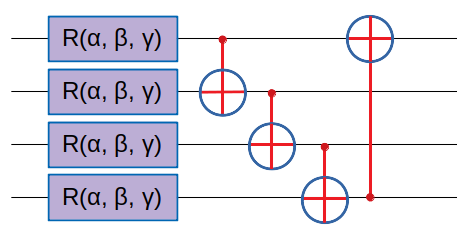

PennyLane's `StronglyEntanglingLayer` template can be used to implement such a layer. It requires four input arguments:

1. `weights`: a matrix containing the angles for all the rotation matrices
2. `wires`: all the qubits are acted upon in this circuit architecture
3. `range`: the range of 2-qubit entangling gates 
4. `imprimitive`: The type of two qubit 

To implement a circuit with multiple layers, `StronglyEntanglingLayers` template can be called from inside a `QNode`. 

<div class="admonition note">
<div class="admonition-title">Note</div>
When using any parameterized quantum circuit, circuit parameters need to be initialized before they can be optimized to converge to the solution. PennyLane provides ready-to-use templates that initialize all the required parameters corresponding to all the circuit architectures it offers. See [pennylane.init](https://pennylane.readthedocs.io/en/latest/code/templates/init_parameters.html#module-pennylane.init) for more details.  
</div>
</div>

For this tutorial, we will implement the following simple strongly entangling circuit with just one layer:

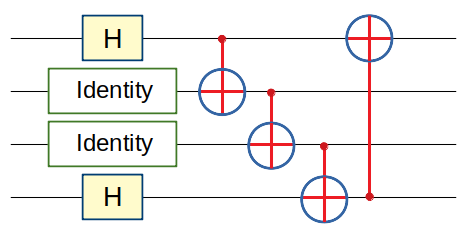

**What is this circuit doing?**

1. After the single qubit gates, $\mid\psi\rangle=\mid0\rangle\mid0\rangle\mid0\rangle\mid0\rangle$ is converted to $\mid\psi\rangle=\mid+\rangle\mid0\rangle\mid0\rangle\mid+\rangle$

2. After the CNOTs, the state is
$$\mid\psi\rangle=\frac{1}{2}[\mid00\rangle\mid00\rangle + \mid01\rangle\mid11\rangle + \mid10\rangle\mid01\rangle + \mid11\rangle\mid10\rangle]$$

**Note**: This is a completely entangled state; subsystem qubit 0,1 have been entangled with subsystem qubit 2,3

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates.layers import StronglyEntanglingLayer

In [2]:
n_wires = 4
pi = np.pi

dev = qml.device('default.qubit', wires = n_wires)

@qml.qnode(dev)
def circuit(angles, A=None, B=None):
    StronglyEntanglingLayer(angles, wires = range(n_wires), r=1)
    return qml.expval.Hermitian(A, wires=[0,1]),qml.expval.Hermitian(B, wires=[2,3])


Note that we do not use random initialization provided by PennyLane here. Instead, we have to provide the angles that result in Hadamard and Identity gates. 

In [3]:
my_angles= np.array([[0, pi/2, 0],[0, 0, 0],[0, 0, 0],[0, pi/2, 0]])
print(my_angles)

[[0.         1.57079633 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         1.57079633 0.        ]]


In [4]:
pauliz = np.array([[1, 0], [0, -1]])
pauli2 = np.kron(pauliz, pauliz)
pauli4 = np.kron(pauli2, pauli2)

In [5]:
circuit(my_angles, A= pauli2, B= pauli2)

array([0.0000000e+00, 4.4408921e-16])

The `circuit` output makes sense as when we measure just one subsystem (a mixed state) of a completely entangled state, the expectation value of Pauli-Z operator averages to zero. 